## Create a simple influnce in the pitch plot

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def plot_pitch( field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20):
    """ plot_pitch
    
    Plots a soccer pitch. All distance units converted to meters.
    
    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)
    """
    fig,ax = plt.subplots(figsize=(13,8)) # create a figure 
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax

In [0]:
import pandas as pd
import numpy as np

away_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv', skiprows=2)
home_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv', skiprows=2)

HTTPError: ignored

In [0]:
locs_home = [(np.asarray(home_data.iloc[:,range(3 + j*2,3 + j*2 +2)])-np.array([0.5,0.5]))*np.array([1,-1]) * np.array([106,68]) for j in range(14)]
locs_away = [(np.asarray(away_data.iloc[:,range(3 + j*2,3 + j*2 +2)])-np.array([0.5,0.5]))*np.array([1,-1]) * np.array([106,68]) for j in range(14)]
locs_ball = [(np.asarray(home_data.iloc[:,range(31,33)])-np.array([0.5,0.5]))*np.array([1,-1]) * np.array([106,68])]
t = home_data['Time [s]']

In [0]:
home_data.head()

,Period,Frame,Time [s],Player11,Unnamed: 4,Player1,Unnamed: 6,Player2,Unnamed: 8,Player3,Unnamed: 10,Player4,Unnamed: 12,Player5,Unnamed: 14,Player6,Unnamed: 16,Player7,Unnamed: 18,Player8,Unnamed: 20,Player9,Unnamed: 22,Player10,Unnamed: 24,Player12,Unnamed: 26,Player13,Unnamed: 28,Player14,Unnamed: 30,Ball,Unnamed: 32
0,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,0.32137,0.21262,0.41094,0.72589,0.41698,0.47843,0.39125,0.32550,0.45388,0.21174,0.52697,0.37980,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
1,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,0.32137,0.21262,0.41094,0.72589,0.41698,0.47843,0.39125,0.32550,0.45388,0.21174,0.52697,0.37980,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
2,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,0.32137,0.21262,0.41094,0.72589,0.41698,0.47843,0.39125,0.32550,0.45388,0.21174,0.52697,0.37980,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
3,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,0.35554,0.32142,0.21241,0.41067,0.72565,0.41703,0.47965,0.39134,0.32566,0.45379,0.21053,0.52731,0.38010,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
4,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,0.35528,0.32136,0.21159,0.41065,0.72510,0.41682,0.47952,0.39141,0.32427,0.45376,0.20950,0.52737,0.37991,0.55202,0.43311,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


In [0]:
np.all(np.isfinite(locs_home[0][24000:25000,:]))

True

In [0]:
def influence_function(player_index, location, time_index, home_or_away):
  from scipy.stats import multivariate_normal as mvn
  if home_or_away == 'h':
    data = locs_home.copy()
  elif home_or_away == 'a':
    data = locs_away.copy()
  else:
    raise ValueError("Enter either 'h' or 'a'.")
    return
  if np.all(np.isfinite(data[player_index][[time_index,time_index + 1],:])) & np.all(np.isfinite(locs_ball[0][time_index,:])):
    jitter = 1e-10 ## to prevent identically zero covariance matrices when velocity is zero
    ## compute velocity by fwd difference
    s = np.linalg.norm(data[player_index][time_index + 1,:] - data[player_index][time_index,:] + jitter) / (t[time_index + 1] - t[time_index])
    ## velocities in x,y directions
    sxy = (data[player_index][time_index + 1,:] - data[player_index][time_index,:] + jitter) / (t[time_index + 1] - t[time_index])
    ## angle between velocity vector & x-axis
    theta = np.arccos(sxy[0] / np.linalg.norm(sxy))
    ## rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    mu = data[player_index][time_index,:] + sxy * 0.5
    Srat = (s / 13) ** 2
    Ri = np.linalg.norm(locs_ball[0][time_index,:] - data[player_index][time_index,:])
    Ri = np.minimum(4 + Ri**3/ (18**3/6),10) ## don't think this function is specified in the paper but looks close enough to fig 9
    S = np.array([[(1 + Srat) * Ri / 2, 0], [0, (1 - Srat) * Ri / 2]])
    Sigma = np.matmul(R,S)
    Sigma = np.matmul(Sigma,S)
    Sigma = np.matmul(Sigma,np.linalg.inv(R)) ## this is not efficient, forgive me.
    out = mvn.pdf(location,mu,Sigma) / mvn.pdf(data[player_index][time_index,:],mu,Sigma)
  else:
    out = np.zeros(location.shape[0])
  return out

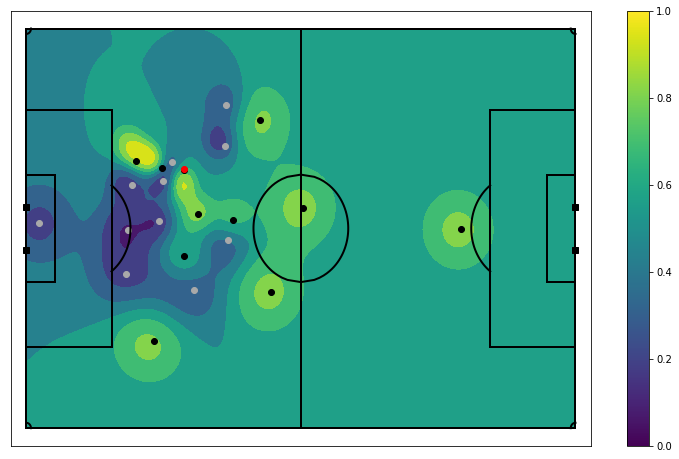

In [0]:
import matplotlib.pyplot as plt

xx,yy = np.meshgrid(np.linspace(-53,53,200),np.linspace(-34,34,200))
Zh = np.zeros(40000)
Za = np.zeros(40000)

for k in range(11):
  Zh += influence_function(k,np.c_[xx.flatten(),yy.flatten()],24000,'h')
  Za += influence_function(k,np.c_[xx.flatten(),yy.flatten()],24000,'a')
Zh = Zh.reshape((200,200))
Za = Za.reshape((200,200))

fig,ax=plot_pitch(field_color="white")
plt.contourf(xx,yy,1 / (1 + np.exp(-Za + Zh)))
for k in range(11):
  plt.scatter(locs_home[k][24000,0],locs_home[k][24000,1],color='darkgray')
  plt.scatter(locs_away[k][24000,0],locs_away[k][24000,1],color='black')
plt.scatter(locs_ball[0][24000,0],locs_ball[0][24000,1],color = 'red')
plt.colorbar()

In [0]:
np.c_[xx.flatten(),yy.flatten()][0]

array([-53., -34.])

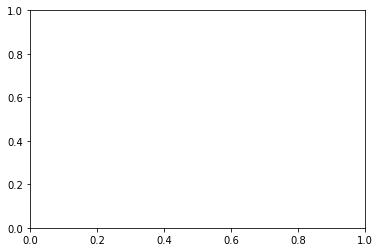

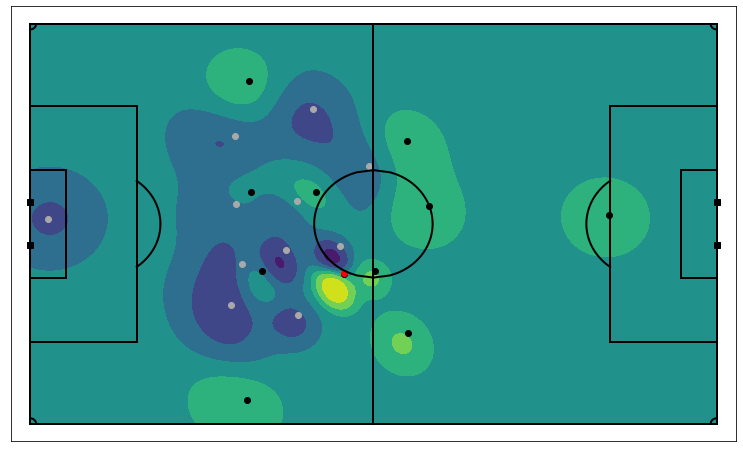

In [0]:
from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = plt.subplots()
ims= []
xx,yy = np.meshgrid(np.linspace(-53,53,200),np.linspace(-34,34,200))
fig,ax=plot_pitch(field_color="white")
def animate(i):
  fr = 100 + i
  Zh = np.zeros(40000)
  Za = np.zeros(40000)
  for k in range(11):
    Zh += influence_function(k,np.c_[xx.flatten(),yy.flatten()],fr,'h')
    Za += influence_function(k,np.c_[xx.flatten(),yy.flatten()],fr,'a')
  Zh = Zh.reshape((200,200))
  Za = Za.reshape((200,200))
  im = plt.contourf(xx,yy,1 / (1 + np.exp(-Za + Zh)))

  for k in range(11):
    plt.scatter(locs_home[k][fr,0],locs_home[k][fr,1],color='darkgray')
    plt.scatter(locs_away[k][fr,0],locs_away[k][fr,1],color='black')
  plt.scatter(locs_ball[0][fr,0],locs_ball[0][fr,1],color = 'red')
HTML(animation.FuncAnimation(fig, animate, frames=50, interval = 40,repeat=False).to_html5_video())